<a href="https://colab.research.google.com/github/SrMouraSilva/Modelagem-matematica-trabalho-final/blob/main/6_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()
 
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 6.27

Reconsider the weather problem of Example 6.6.

Relembrando exemplo 6.6
> **Exemplo 6.6** Consider a layer of air that is heated from the bottom. In certain situations the warmer air rising up interacts with the colder air sinking down to form turbulent convection rolls. The complete derivation of the dynamics of motion involves a system of partial differential equations, which can be solved by the method of Fourier transforms; see Lorentz (1963). A simplified representation involves three state variables. The variable $x_1$ represents the rate at which the convection rolls rotate, $x_2$ represents the temperature difference between the ascending and descending air currents, and $x_3$ represents the deviation from linearity of the vertical temperature profile, a positive value indicating that the temperature varies faster near the boundary. The equations of motion for this system are
\begin{aligned}
x_1' &= f_1(x_1, x_2, x_3) = - \sigma x_1 + \sigma x_2 \\
x_2' &= f_2(x_1, x_2, x_3) = - x_2 + rx_1 - x_1 x_3 \\
x_3' &= f_3(x_1, x_2, x_3) = - b x_3 + x_1 x_2
\end{aligned}
and we will consider the realistic case where $\sigma=10$ and $b=8/3$. The remaining parameter $r$ represents the temperature difference between the top and bottom of the air layer. Increasing $r$ pumps more energy into the system, creating more vigorous dynamics. The dynamical system of Eq. (6.19) is called the Lorentz equations, after the meteorologist E. Lorentz who analyzed them;


### a) Use a computer implementation of the Euler method with $N= 500$ and $T = 2.5$ (step size $h=0.005$) to reproduce the results of Figure 6.35 in the text. Assume $\sigma=10, b=8/3, r=18$, and use the initial condition $(x_1, x_2, x_3) = (6.7,6.7,17)$.

Temos as seguintes equações diferenciais:

In [ ]:
def equacoes(x1, x2, x3, sigma=10, b=8/3, r=8):
    return (
        - sigma * x1 + sigma * x2,
        - x2 + r*x1 - x1*x3,
        -b*x3 + x1*x2
    )
 
x1, x2, x3 = var('x1 x2 x3', real=True)
 
dFdx1, dFdx2, dFdx3 = equacoes(x1, x2, x3, r=18)

Math(f"""
\\begin{{aligned}}
x_1' &= {latex(dFdx1)} \\\\
x_2' &= {latex(dFdx2)} \\\\
x_3' &= {latex(dFdx3)} \\\\
\\end{{aligned}}
""")

<IPython.core.display.Math object>

A seguir, o método de Euler para 3 variáveis:

In [ ]:
def MetodoEuler(funcoes, variaveis, valores_iniciais, N=100, t_0=0, T=400):
    retorno = np.zeros((4, N))
    f1 = lambdify(variaveis, funcoes[0], 'numpy')
    f2 = lambdify(variaveis, funcoes[1], 'numpy')
    f3 = lambdify(variaveis, funcoes[2], 'numpy')
    
    x1_0, x2_0, x3_0 = valores_iniciais
 
    x1_n = x1_0
    x2_n = x2_0
    x3_n = x3_0
    t_n = t_0
 
    retorno[:, 0] = [t_n, x1_n, x2_n, x3_n]
 
    h = (T-t_0)/N
    for n in range(N-1):
        x1_n = x1_n + h*f1(x1_n, x2_n, x3_n)
        x2_n = x2_n + h*f2(x1_n, x2_n, x3_n)
        x3_n = x3_n + h*f3(x1_n, x2_n, x3_n)
        t_n = t_n+h
 
        retorno[:, n+1] = [t_n, x1_n, x2_n, x3_n]
    
    resultado = pd.DataFrame(retorno.T, columns=['t', 'x1', 'x2', 'x3'])
    resultado.index = resultado.t
    del resultado['t']
    return resultado

A simulação e o gráfico solicitado:

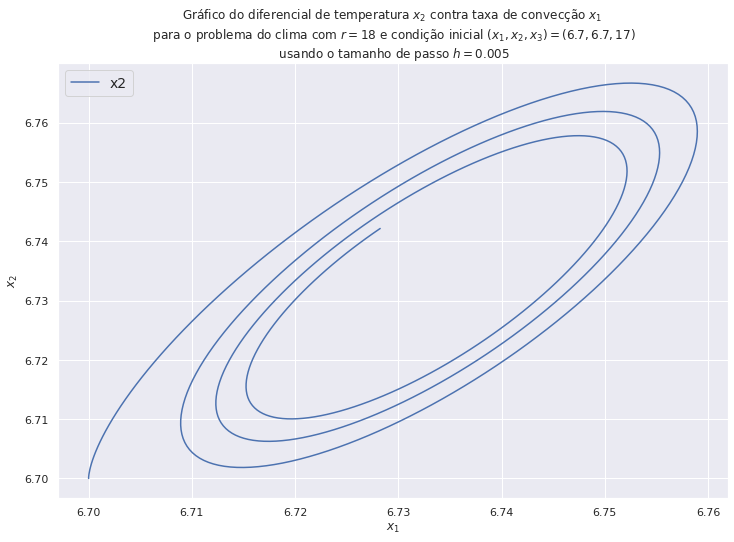

In [ ]:
valores_iniciais_a = (6.7, 6.7, 17)

simulacao_a = MetodoEuler(
    funcoes=(dFdx1, dFdx2, dFdx3),
    variaveis=(x1, x2, x3),
    valores_iniciais=valores_iniciais_a,
    N=500,
    T=2.5
)

simulacao_a[['x1', 'x2']].plot.line(
    x='x1',
    y='x2',
    title="Gráfico do diferencial de temperatura $x_2$ contra taxa de convecção $x_1$ \n para o problema do clima com $r=18$ e condição inicial $(x_1, x_2, x_3)=(6.7, 6.7, 17)$ \n usando o tamanho de passo $h=0.005$",
    figsize=(12, 8),
    xlabel='$x_1$',
    ylabel='$x_2$'
)

### b) Repeat part (a) for larger step sizes $h=0.01, 0.015, \cdots,0.03$. You can keep $N=500$ and increase $T=5, 7.5, 10, 12.5$, and $15$. How does the simulated solution curve change as the step size increases?

Testaremos os seguintes valores para T. Observe que adicionamos o $T=2.5$ a lista de solicitados pela questão.

In [ ]:
Ts = [2.5, 5, 7.5, 10, 12.5, 15]

Geremos o gráfico correspondente a Figura 6.35 para verificar se o comportamento é parecido. Isto é, geremos diversos gráficos do diferencial de temperatura $x_2$ contra a taxa de convecção $x_1$ para o problema do clima com $r=18$, condição inicial $(x_1, x_2, x_3)=(6.7, 6.7, 17)$ e $h=\frac{T}{N}$, com $N=500$.

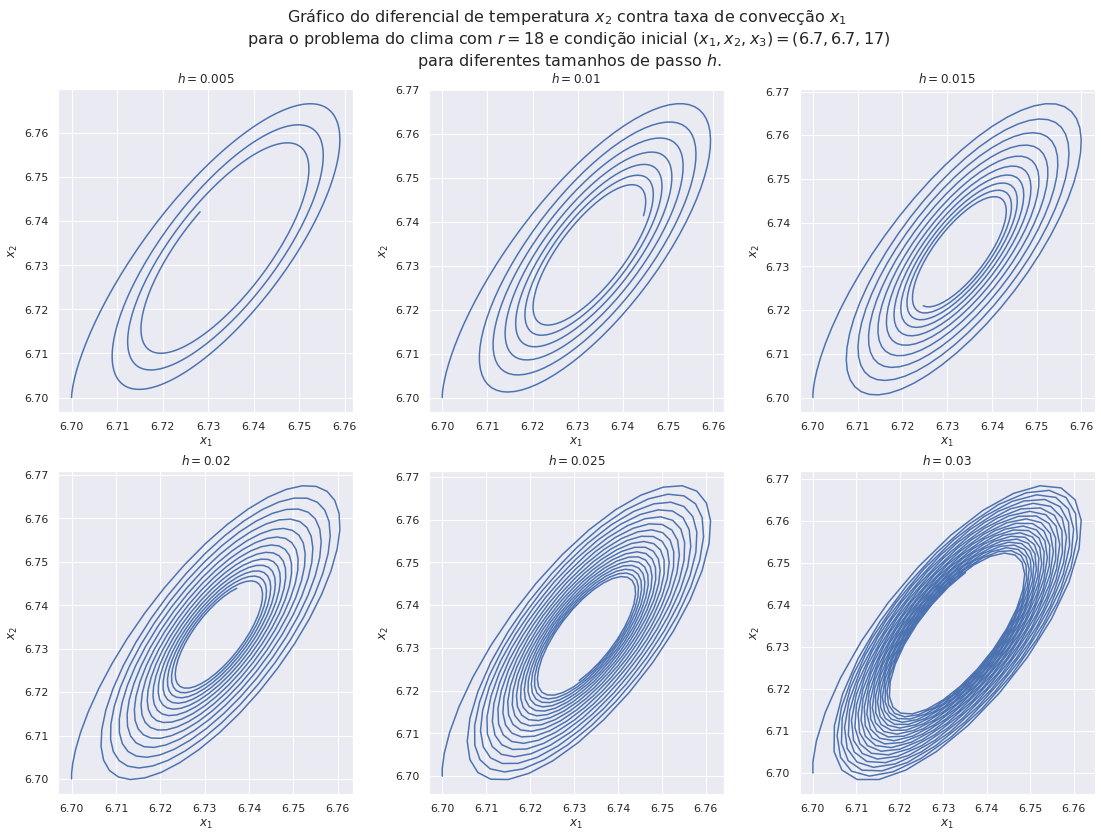

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
fig.tight_layout(pad=4.0)
fig.suptitle(f"Gráfico do diferencial de temperatura $x_2$ contra taxa de convecção $x_1$ \n para o problema do clima com $r=18$ e condição inicial $(x_1, x_2, x_3)=(6.7, 6.7, 17)$ \n para diferentes tamanhos de passo $h$.", fontsize=16)
plt.subplots_adjust(top=0.885)


for i, (T, ax) in enumerate(zip(Ts, axes.flatten())):
    MetodoEuler(
        funcoes=(dFdx1, dFdx2, dFdx3),
        variaveis=(x1, x2, x3),
        valores_iniciais=valores_iniciais_a,
        N=500,
        T=T
    )[['x1', 'x2']].plot.line(
        x='x1',
        y='x2',
        xlabel='$x_1$',
        ylabel='$x_2$',
        title=f"$h={T/500}$",
        ax=ax,
    )
    ax.get_legend().remove()

Pelos gráficos com passos $h = 0.005, 0.01, 0.015, 0.02, 0.025, 0.03$
acima, podemos observar que a solução aproximada encontrada pelo método de Euler tende para o ponto de equilíbrio $E^{+} =  (\sqrt(b\cdot(r-1)), \sqrt(b\cdot(r-1)), r-1)$. Como $b = \frac{8}{3}$ e $r = 18$, $E^{+}=(\sqrt\frac{8\cdot17}{3}, \sqrt\frac{8\cdot17}{3}, 17) \approx (6.73, 6.73, 17)$.


### c) Find the coordinates of the equilibrium point $E^+$ when $\sigma=10,b=8/3$, and $r=24$. Verify by simulation. Begin the simulation at the initial condition $E^+$ and check that the solution remains at this point.

Temos as seguintes equações diferenciais:

In [ ]:
dFdx1, dFdx2, dFdx3 = equacoes(x1, x2, x3, r=24)

Math(f"""
\\begin{{aligned}}
x_1' &= {latex(dFdx1)} \\\\
x_2' &= {latex(dFdx2)} \\\\
x_3' &= {latex(dFdx3)} \\\\
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Quando $\sigma=10,b=8/3$, and $r=24$, temos que 
\begin{aligned}
E^{+} 
&= \left(\sqrt(b\cdot(r-1)), \sqrt(b\cdot(r-1)), r-1\right)
\left(\sqrt\frac{8\cdot23}{3}, \sqrt\frac{8\cdot23}{3}, 23\right) \\
&\approx (7.832, 7.832, 23).
\end{aligned}

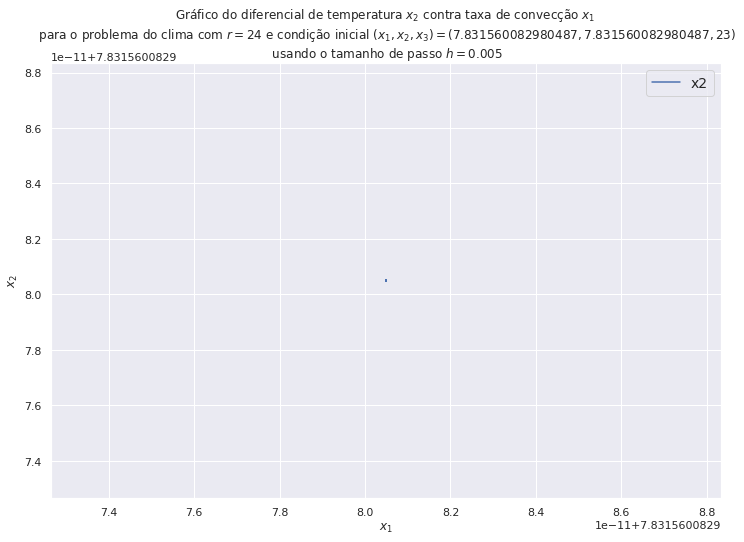

In [ ]:
valores_iniciais_c = (np.sqrt(23*8/3), np.sqrt(23*8/3), 23)

simulacao_c = MetodoEuler(
    funcoes=(dFdx1, dFdx2, dFdx3),
    variaveis=(x1, x2, x3),
    valores_iniciais=valores_iniciais_c,
    N=1000,
    T=50
)

simulacao_c[['x1', 'x2']].plot.line(
    x='x1',
    y='x2',
    title=f"Gráfico do diferencial de temperatura $x_2$ contra taxa de convecção $x_1$ \n para o problema do clima com $r=24$ e condição inicial $(x_1, x_2, x_3)={valores_iniciais_c}$ \n usando o tamanho de passo $h=0.005$",
    figsize=(12, 8),
    xlabel='$x_1$',
    ylabel='$x_2$'
)

Pelo gráfico acima, podemos observar que a solução encontrada pelo método de Euler tenderá para o ponto de equilíbrio $E^{+} \approx (7.832,7.832,23)$. Atente-se na dimensão dois eixos indicada pelo gráfico!

### d) Is the equilibrium point $E^+$ found in part (c) stable? Verify by simulation. Begin the simulation at the initial condition $E^+ + (0.1,0.1,0)$ and determine whether the solution tends toward the equilibrium point $E^+$. How small a step size $h$ must be used to ensure that the simulation results represent the true behavior of the continuous time dynamical system?

Testaremos os seguintes valores para h:

In [ ]:
valores_iniciais_d = (np.sqrt(23*8/3)+0.1, np.sqrt(23*8/3)+0.1, 23+0)

hs = [
    0.01,
    0.004,
    0.003,
    0.001,
]

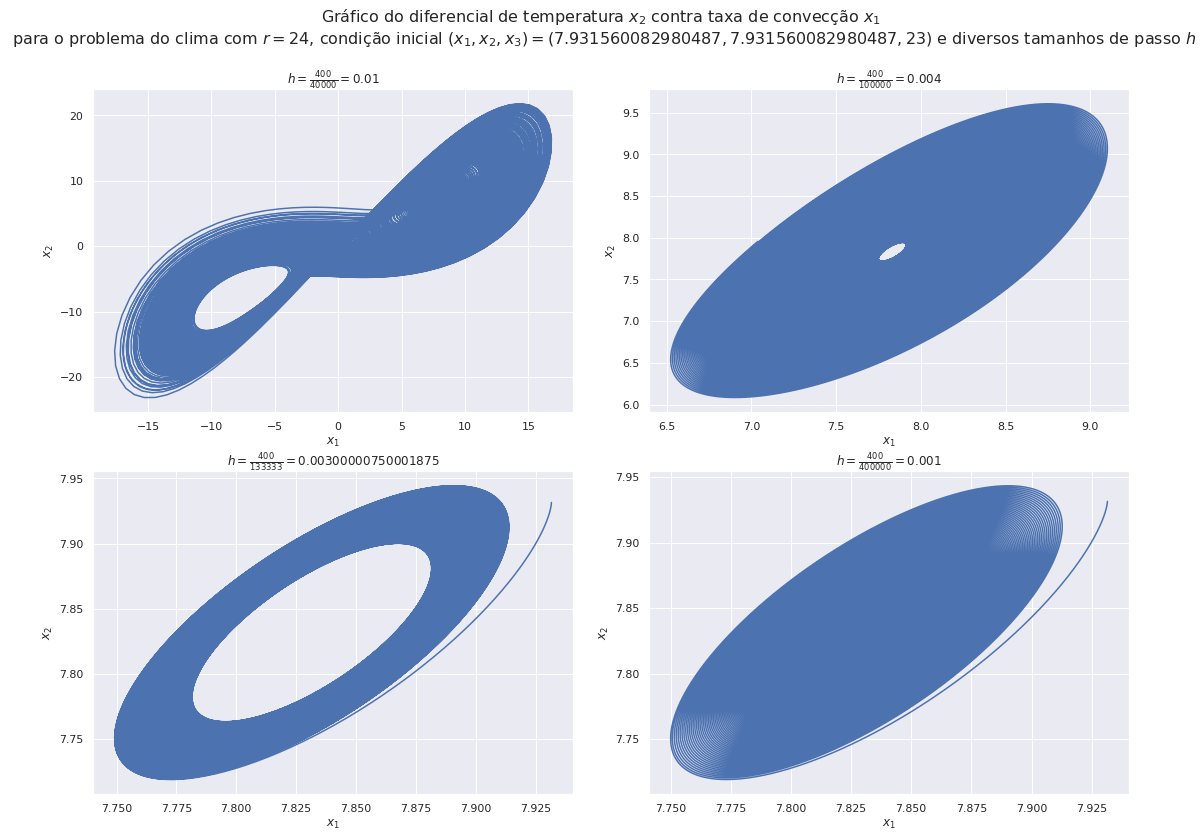

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.tight_layout(pad=4.0)
fig.suptitle(f'Gráfico do diferencial de temperatura $x_2$ contra taxa de convecção $x_1$ \n para o problema do clima com $r=24$, condição inicial $(x_1, x_2, x_3)={valores_iniciais_d}$ e diversos tamanhos de passo $h$', fontsize=16)
plt.subplots_adjust(top=0.885)

simulacoes_d = []

for i, (h, ax) in enumerate(zip(hs, axes.flatten())):
    T = 400
    N = int(T/h)

    simulacao = MetodoEuler(
        funcoes=(dFdx1, dFdx2, dFdx3),
        variaveis=(x1, x2, x3),
        valores_iniciais=valores_iniciais_d,
        N=N,
        T=T
    )
    simulacoes_d.append(simulacao)
    simulacao[['x1', 'x2']].plot.line(
        x='x1',
        y='x2',
        xlabel='$x_1$',
        ylabel='$x_2$',
        title=f"$h=\\frac{{{T}}}{{{N}}} = {T/N}$",
        ax=ax
    )
    ax.get_legend().remove()

Pelos gráficos acima, podemos ver que o gráfico com passo $h=0.01$ não converge para o ponto de equilíbrio $E^{+}$, tendo um comportamento parecido com uma pista em formato de oito. De forma similar, $h=0.004$ não converge, pois não houve tempo de execução grande o suficiente para ficar similar ao primeiro caso.

Já nos dois casos seguintes $h=0.003$ e $h=0.001$ percebe-se que após algumas "voltas", a solução acaba convergindo para o ponto de equilíbrio $E^{+}$. Assim, o ponto de equilíbrio $E^{+}$ é uma espiral estável. 

Vejamos agora, para as mesmas simulações, o comportamento separado de $x_1$ e de $x_2$ ao longo do tempo:

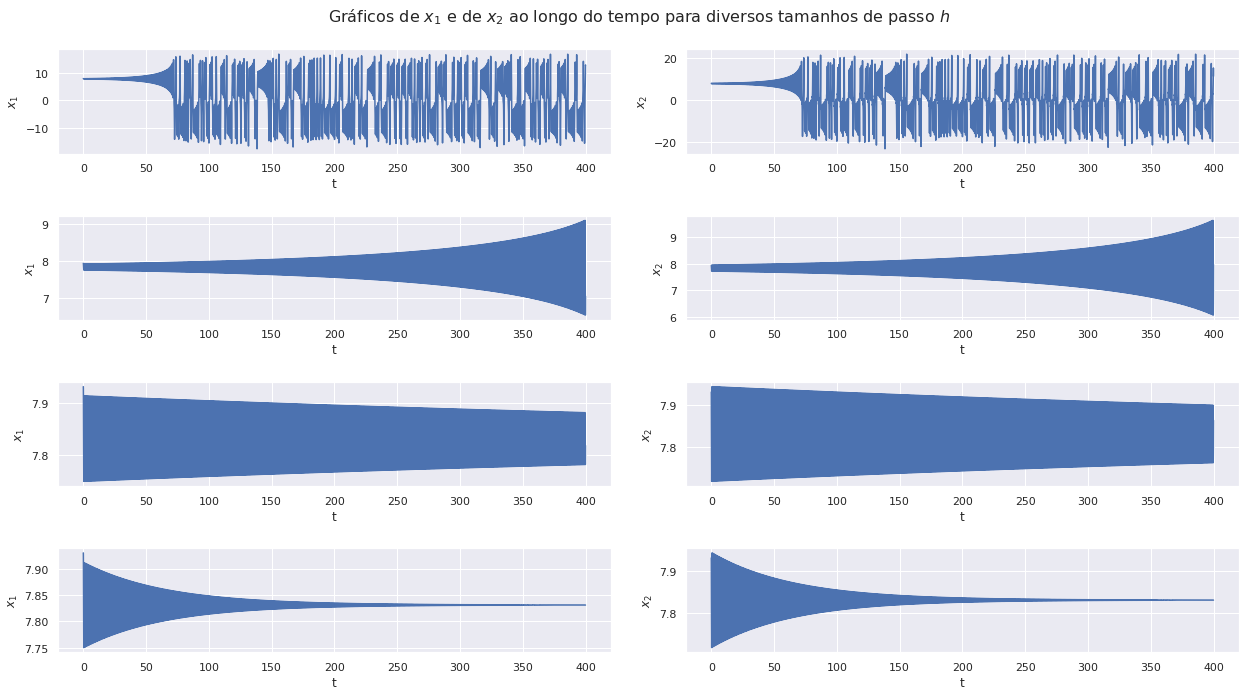

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 10))
fig.tight_layout(pad=4.0)
fig.suptitle(f'Gráficos de $x_1$ e de $x_2$ ao longo do tempo para diversos tamanhos de passo $h$', fontsize=16)
plt.subplots_adjust(top=0.92)

for s, ax1, ax2 in zip(simulacoes_d, axes[:, 0], axes[:, 1]):
    s.x1.plot(ax=ax1, ylabel='$x_1$')
    s.x2.plot(ax=ax2, ylabel='$x_2$')

Pelos graficos acima, nota-se que não há convergência para os dois primeiros casos de $h$. Já para os dois últimos, há convergência para o ponto de equilíbrio $E^{+} \approx (7.832,7.832,23)$. Assim, pelas simulações testadas, o tamanho de passo $h$ deve ser ao menos $0.003$ para garantir que os resultados da simulação representem o verdadeiro comportamento do sistema dinâmico de tempo contínuo.
